So we are going to try to do Gina's thing. That means finding the word, getting the 6 words before and behind, replacing them with the Whissel Dictionary numbers, then doing something with them. I will use the text of The Waves because I already have it. I will use the word 'bird' because it is in there a few times. I used WordSmith Tools  to doublecheck concordance accuracy and context accuracy. Re.sub routines first save out text and apostrophes, then remove apostrophes (single quotes) preceded or followed by a space. Thus only apostrophes inside words remain. 

In [12]:
import re
import nltk
import matplotlib.pyplot as plt
from statistics import mean

targetDoc = "texts/chores.txt"     # the text to analyze (relative path)
targetWord = "cows"               # the word type you want to score
targetWindow = 9                  # this is tokens before and after target

doc = open(targetDoc, 'r').read()                  # open source text
doc_words = re.sub("[^a-zA-Z']"," ", doc)          # save only text and apostrophes
doc_words = re.sub("('\s|\s')"," ", doc_words).lower().split()     # remove apostrophes outside words
doc_text = nltk.Text(doc_words)
myword = doc_text.concordance(targetWord) 
print(myword)


Displaying 3 of 3 matches:
ts i doubt that titian ever felt this rat gnaw painters live lives of methodica
ike sparks upon the depths of green a rat wreathing with maggots under a rhubar
apple tree stark in the moonlight the rat swarming with maggots the lustre drip
None


    c = nltk.ConcordanceIndex(doc_text.tokens, key = lambda s: s.lower())
basically indexes the words for every token of the text. The 'offset' function returns the list of token offset positions for a word. (c.\_tokens) is the list of words, so a subscript of that will access the exact word at that position. 
Next, open the DA file and read it into a dictionary. Each line is split so the word is the key and the three Whissell numbers is the value. Lookup is simple: get(key) returns value: daffect.get(c.\_tokens[335]). Then split the value strings into three floating point numbers because math.

In [13]:
c = nltk.ConcordanceIndex(doc_text.tokens, key = lambda s: s.lower())
locations = c.offsets(targetWord)

with open("texts/DAL.txt") as dictionary_affect_file:
   daffect = dict(line.rstrip().split(",", 1) for line in dictionary_affect_file)

alleevals = []                   #declare lists of vals for every token found in text
allaavals = []
alliivals = []
allNonelist = []                 # keep all nonelist for token report
allAvgeevals = []                # keep list of avg vals for plotting
allAvgaavals = []
allAvgiivals = []

for location in locations:       #iterate over list of concordance hit offsets
    print (c._tokens[location], "offset =", location)
    phrase = []                  #keep a list of tokens in the phrase
    nonelist = []                #new val lists for each interation of a location
    eevals = []
    aavals = []
    iivals = []     
    for i in range(0-targetWindow, 1+targetWindow):        #iterate over range from target offset, range extends up to but no including
        #print (c._tokens[location+i], daffect.get(c._tokens[location+i]))
        #print (c._tokens[location-i], daffect.get(c._tokens[location-i]))
        phrase.append(c._tokens[location+i]) 
         
        if daffect.get(c._tokens[location+i]) is None:
            nonelist.append(c._tokens[location+i])         # prepare report of words not in DAL
        else:
            eeval, aaval, iival = daffect.get(c._tokens[location+i]).split(",")
            eevals.append(float(eeval))                    # have to convert these to fp numbers
            aavals.append(float(aaval))
            iivals.append(float(iival))
            #print (c._tokens[location+i], "eevals = ", eevals)
            #print ("eevals length =",len(eevals))
            
    alleevals.extend(eevals)                 #add vals from this token onto alltokens list
    allaavals.extend(aavals)                 #to calculate mean of alltokens 
    alliivals.extend(iivals)                 #problem: target word gets added each time
    allNonelist.extend(nonelist)
    #print (alleevals) #check to see
    
    avgeevals = round(mean(eevals), 4)       # rounded to 4 decimal places like Whissell
    avgaavals = round(mean(aavals), 4)       # rounded to 4 decimal places like Whissell
    avgiivals = round(mean(iivals), 2)       # rounded to 2 decimal places like Whissell
    
    allAvgeevals.append(avgeevals - 1.85)  # .extend causes a TypeError: 'float' object is not iterable
    allAvgaavals.append(avgaavals - 1.67)  # We subtract the balanced corpus mean to give variance
    allAvgiivals.append(avgiivals - 1.525)
    
    # here follow the token reports: all the words, the No Vals list, and the scores
    print (" ".join(word for word in phrase))
    print ("No Values for", nonelist)
    print ("EE =", avgeevals, "AA =", avgaavals, "II =", avgiivals, "\n") 

hitratio = 100*(round(len(alleevals) / (len(alleevals) + len(allNonelist)), 3))
meanTotaleevals = round(mean(alleevals), 4)
meanTotalaavals = round(mean(allaavals), 4)
meanTotaliivals = round(mean(alliivals), 2)

# here follow the type reports: the target word, its score, and the hit ration. Need anything else?
print ("Type Means for", targetWord) 
print ("EE =", meanTotaleevals)
print ("AA =", meanTotalaavals)
print ("II =", meanTotaliivals)
print ("No values for", list(sorted(set(allNonelist))))
print ("Hit Ratio = %",hitratio)
    


rat offset = 40207
doubt that titian ever felt this rat gnaw painters live lives of methodical
No Values for ['titian', 'rat', 'methodical']
EE = 1.7988 AA = 1.8161 II = 1.4 

rat offset = 62266
upon the depths of green a rat wreathing with maggots under a rhubarb
No Values for ['rat', 'wreathing', 'maggots', 'rhubarb']
EE = 1.8047 AA = 1.5201 II = 1.42 

rat offset = 62743
tree stark in the moonlight the rat swarming with maggots the lustre dripping
No Values for ['stark', 'rat', 'swarming', 'maggots', 'lustre', 'dripping']
EE = 2.0419 AA = 1.3099 II = 1.71 

Type Means for rat
EE = 1.8663
AA = 1.5774
II = 1.49
No values for ['dripping', 'lustre', 'maggots', 'methodical', 'rat', 'rhubarb', 'stark', 'swarming', 'titian', 'wreathing']
Hit Ratio = % 66.7


Next step is to display values for each word plotted over the book. Really need to follow her methodology as first guesstimate. "The mean of all values for a sample characterizes the sample as a whole." Whissell 2009, 515. She takes the mean for all word sets involved. For _Much Ado about Nothing_ she takes total speeches from each character (p. 516) and compares values to compare characters. In her other test she examines a police-involved shooting in Ireland, the speech of the shooter and of the later police report. There she focuses on the extreme ends of the emotion scales, and the method is not quite clear. She refers to a 2007 article on "Ruth" that clarifies nothing--she compares to "normative" numbers of strong emotion words in her 1998 corpus but does not provide those numbers anywhere that I found. 
Display: from DAL: on a balanced corpus, mean ee is 1.85, with an sd of .36. So, if we subtract 1.85 from our eevals we will get the distance positive or negative from the mean. Lets try it.

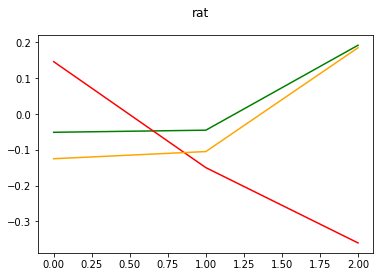

In [14]:
plt.plot(allAvgeevals, 'g', allAvgaavals, 'r', allAvgiivals, 'orange')
plt.suptitle(targetWord)
plt.show()